# Final Project

The final project is designed to let you apply what you have learned so far, and demonstrate that you have mastered it. The submission will be graded on the correctness and performance of the execution of your analysis (50%), the ambitiousness of the problems chosen (30%), and the creativity of your questions and solutions (20%).

Your submission should include all outputs and be *self-contained*, so it can be executed if necessary.

The submission includes two parts:
1. this notebook
2. a 15-min presentation, to be held on May 8


## Submission
The project is due on ***May 07, 23:59 CET*** (counted as the time stamp when it is received). Late submissions will **not** be considered, and graded as 0! 

To submit, please:

1. copy this file and all additional data into a folder with your group ID
3. zip the folder
4. send a copy of the zip file to Dirk Hovy <dirk.hovy@unibocconi.it> and Tommaso Fornaciari <fornaciari@unibocconi.it>

## 1. Data, Preprocessing, and Annotation (4 pts)

Find a data set for text classification and a data set for structured prediction. These can be the same.
Kaggle is a good place to start, or the Google data set search. 

The data sets should have **at least 5,000** documents each. **At least 2000 instances** need to be labeled. If there is no label provided, you can annotate your own. You can get up to **3 bonus points** for annotation, depending on the amount and complexity of the annotation.

Split the data into dedicated training, development, and test sets (if they do not include these already)!

Briefly (max. 100 words!) describe the content and type of the data set, and what you are planning to look at. 

...

Preprocess the data and explain (max. 200 words) which preprocessing steps you chose and why, and give statistics of the number of documents, types, and tokens, before and after preprocessing.

...

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

data = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...,1
1,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails why congress is falling...,0
2,https://www.huffingtonpost.com/entry/eat-your-...,eat your veggies: 9 deliciously different recipes,0
3,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar from getting t...,1
4,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close to using word 'strea...,1


In [68]:
nlp = spacy.load('en_core_web_sm')

def preprocessing(sentence, entity_rec = False, POS_tagging_prep = True):
    """
    Input: A document
    Output: A cleaned, tokenised document
    """
    s_list = []
    # POS_tagging and preprocessing 
    if POS_tagging_prep == True:
         return ' '.join([token.lemma_ for token in nlp(sentence) if (token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'X'} and (token.lemma_.lower() != '’s') 
                                                                  and (token.is_stop == False) and (token.is_punct == False) 
                                                                  and (token.like_url == False))])
                
    # Tokenisation / stop-word removal / punctuation removal / url removal
    else:
        spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
        if entity_rec == True:
            s_analysed = nlp(sentence)
            # Entity recognition
            entity = [entity.text for entity in s_analysed.ents]
            for words in entity:
                modified_words = words.replace(" ", "_")
                sentence = sentence.replace(words, modified_words)        
        s_analysed = nlp(sentence.replace("’s", "")) # removal of ’s before tokenisation 
        for token in s_analysed:
            if (token.is_stop == False) and (token.is_punct == False) and (token.like_url == False):
                s_list.append(token.lemma_.lower())
    return s_list

def verb(text):
    '''
    return the strings with the verbs only
    '''
    return ' '.join([token.lemma_ 
             for token in nlp(text) 
             if token.pos_ in {'VERB'}])

In [69]:
#data['cleaned'] = data.headline.apply(preprocessing, entity_rec = True)
#data['verb'] = data.headline.apply(verb)

There are 28619 article headlines
Presence of NAN True
0    14985
1    13634
Name: is_sarcastic, dtype: int64


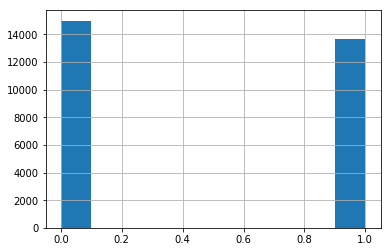

In [51]:
# data.drop("article_link", axis = 1, inplace = True)

data['Set'] = np.random.choice(
    ['train', 'valid', 'test'],
    data.shape[0],
    p=[0.7, 0.15, 0.15]
)

print("There are", data.shape[0],'article headlines')
print("Presence of NAN" , data.isna().values.any())
print(data.is_sarcastic.value_counts())
data.is_sarcastic.hist()

In [71]:
#data.to_csv('cleaned_data.csv')

In [258]:
data = pd.read_csv("cleaned_data.csv")
data.cleaned.dropna(axis = 0,inplace= True)

In [259]:
no_verb = data[["headline","cleaned","Set","is_sarcastic"]].dropna()

In [260]:
data.head()

,Unnamed: 0,headline,is_sarcastic,cleaned,verb,Set
0,0,thirtysomething scientists unveil doomsday clo...,1,thirtysomething scientist hair loss,NaN,train
1,1,dem rep. totally nails why congress is falling...,0,totally nail fall short gender racial equality,nail fall,train
2,2,eat your veggies: 9 deliciously different recipes,0,eat veggie deliciously different recipe,eat,train
3,3,inclement weather prevents liar from getting t...,1,inclement weather prevent liar get work,prevent get work,train
4,4,mother comes pretty close to using word 'strea...,1,mother come pretty close word streaming correctly,come use,test


In [261]:
no_verb.cleaned.isna().any()

False

In [262]:
sarcasm = no_verb.loc[no_verb["is_sarcastic"] == 1,["headline","cleaned","verb"]]
normal = no_verb.loc[no_verb["is_sarcastic"] == 0,["headline","cleaned","verb"]]

/home/hugopao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [319]:
X_train = no_verb.loc[no_verb.Set =='train', ["cleaned"]]
y_train = no_verb.loc[no_verb.Set =='train', ["is_sarcastic"]]

X_valid = no_verb.loc[no_verb.Set =='valid', ["cleaned"]]
y_valid = no_verb.loc[no_verb.Set =='valid', ["is_sarcastic"]]

X_test = no_verb.loc[no_verb.Set =='test', ["cleaned"]]
y_test = no_verb.loc[no_verb.Set =='test', ["is_sarcastic"]]

## 2. Research Question(s) (2 pts)

Describe what question you are investigating with the data (max. 100 words)

...

## 3. Analysis (6 pts)

Apply at least one version of *each* of the following analysis methods to the data set (justify your choices):
1. Topic modeling with LDA (3 pts). Justify your choice of number of topics!
2. Dense word embeddings ***or*** document embeddings: visualize these and show a clustering (3 pts) 

Your analysis needs to be run on the training data only! You can use the dev set for tuning.

### Other methods
If appropriate for your problem, feel free to explore other methods, as long as they do not require additional libraries (**up to 2 bonus points**).

In [10]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                             min_df=0.01, #df stands for document frequency
                             max_df=0.6, 
                             stop_words='english')
X = tfidf_vectorizer.fit_transform(sarcasm.cleaned.dropna().tolist())

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', min_df=0.01, max_df=0.6, stop_words='english')

X2 = vectorizer.fit_transform(sarcasm.cleaned.dropna().tolist())

df = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': X2.sum(axis=0).A1, 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': X.sum(axis=0).A1
                       })
print("Sarcasm Words")
df = df.sort_values(['tfidf', 'tf', 'idf'])
df.tail()

Sarcasm Words


,word,tf,idf,tfidf
18,nation,385,4.569496,308.890973
37,woman,466,4.388481,360.380507
24,report,573,4.166645,455.597051
19,new,753,3.905490,615.215899
17,man,1001,3.612780,743.379542


In [11]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                             min_df=0.01, 
                             max_df=0.6, 
                             stop_words='english')
X = tfidf_vectorizer.fit_transform(normal.cleaned.dropna().tolist()) #I use the title to get the topic
vectorizer = CountVectorizer(analyzer='word', min_df=0.01, max_df=0.6, stop_words='english')

X2 = vectorizer.fit_transform(normal.cleaned.dropna().tolist())

df = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': X2.sum(axis=0).A1, 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': X.sum(axis=0).A1
                       })
print("Normal")
df = df.sort_values(['tfidf', 'tf', 'idf'])
df.tail()

Normal


,word,tf,idf,tfidf
14,man,314,4.860292,256.871140
21,say,395,4.630145,344.223808
31,woman,473,4.473098,389.389017
16,new,477,4.447400,400.367527
25,trump,498,4.397906,432.726904


# **Language Model**

In [12]:
from collections import defaultdict
import numpy as np
import nltk


smoothing = 0.001
counts = defaultdict(lambda: defaultdict(lambda: smoothing))
sarcasm["headline"] = sarcasm["headline"].astype(str)
corpus = [line.strip().split() for line in sarcasm.headline.tolist()]

#collect and count
for sentence in corpus:
    #include start and stop in the sentence
    tokens = ['*', '*','*','*','*'] + sentence + ['STOP']
    for u, v, w, x, y, z in nltk.ngrams(tokens, 6): #we create the ngrams from the sentence and we count them
        counts[u, v, w, x, y][z] += 1

def logP(u, v, w):
    #(u,v,w) => P(w) preceeded by u,v we compute the log proba. to avoid numbers that are too small to divivde byand get infinty
    return np.log(counts[(u, v)][w]) - np.log(sum(counts[(u, v)].values()))

def sentence_logP(S):
    #score a sentence in log likelihood with chain rule (product becomes sum with log) S: lits of strings
    tokens = ['*', '*'] + S + ['STOP']
    return sum([logP(u, v, w) for u, v, w in nltk.ngrams(tokens, 3)])
    #for each sentence we eaxtract the trigrams and we compute their proba, and then sum it so we get the log likelihood

In [13]:
def sample_next_word(u, v, w, x, y):
    #sample a word v based on the history (u,v)
    keys, values = zip(*counts[(u, v, w, x, y)].items()) #items returns a litsof tuples keys and values
    #zip takes any number of arguments and zips them together 
    values = np.array(values)
    values /= values.sum() # create probability distro
    sample = np.random.multinomial(1, values) # pick one position (returns a position)
    return keys[np.argmax(sample)]

def generate2(initial=[]):
    result = ['*', '*','*','*','*'] + initial
    next_word = sample_next_word(result[-5], result[-4], result[-3],result[-2], result[-1])
    result.append(next_word)
    while next_word != 'STOP':
        next_word = sample_next_word(result[-5], result[-4], result[-3],result[-2], result[-1])
        result.append(next_word)

    return ' '.join(result[2:-1])
    return result

In [14]:
print(generate2(['john']))

* * * john bolton insists iran likely harboring dangerous terrorist osama bin laden


In [15]:
print(generate2(['john']))

* * * john edwards pays $30 to register edwards2016.com just in case


In [16]:
print(generate2(['john']))

* * * john kelly resigns in last-ditch effort to save his and trump's friendship


In [17]:
print(generate2(['politicians']))

* * * politicians ignoring the dangers of jowl implants


In [27]:
print(generate2([]))

* * * universe feels zero connection to guy tripping on mushrooms


In [48]:
#checking if the generated headlines is in the training data
print(sarcasm["headline"].str.contains("universe feels zero connection to guy tripping on mushrooms").any())
print(sarcasm["headline"].str.contains("politicians ignoring the dangers of jowl implants").any())
print(sarcasm["headline"].str.contains("john bolton insists iran likely harboring dangerous terrorist osama bin laden").any())
print(sarcasm["headline"].str.contains("john edwards pays $30 to register edwards2016.com just in case").any())

True
True
True
False


### Trying with 2grams because with 6grams its too specific and the language model just spits out headlines from the training data

In [31]:
from collections import defaultdict
import numpy as np
import nltk



for sentence in corpus:
    tokens = ['*', '*'] + sentence + ['STOP']
    for u, v, w in nltk.ngrams(tokens, 3):
        counts[(u, v)][w] += 1

def logP(u, v, w):
    return np.log(counts[(u, v)][w]) - np.log(sum(counts[(u, v)].values()))

def sentence_logP(S):
    tokens = ['*', '*'] + S + ['STOP']
    return sum([logP(u, v, w) for u, v, w in nltk.ngrams(tokens, 3)])

In [32]:
def sample_next_word(u, v):
    keys, values = zip(*counts[(u, v)].items())
    values = np.array(values)
    values /= values.sum() # create probability distro
    sample = np.random.multinomial(1, values) # pick one position
    return keys[np.argmax(sample)]

def generate():
    result = ['*', '*']
    next_word = sample_next_word(result[-2], result[-1])
    result.append(next_word)
    while next_word != 'STOP':
        next_word = sample_next_word(result[-2], result[-1])
        result.append(next_word)

    return ' '.join(result[2:-1])

In [34]:
generate()

"dog can't believe he left consulate"

In [38]:
generate()

'deceased souls backed up at tall building thinking about, you know'

In [56]:
generate()

'sighing trump sexual assault has cooled down'

In [50]:
generate()

'increasingly desperate advertisers settle for more attainable 35-to-44-year-old demographic'

In [54]:
generate()

'matt lauer returns to stage for humans'

In [57]:
print(sarcasm["headline"].str.contains("dog can't believe he left consulate").any())
print(sarcasm["headline"].str.contains("deceased souls backed up at tall building thinking about, you know").any())
print(sarcasm["headline"].str.contains("sighing trump sexual assault has cooled down").any())
print(sarcasm["headline"].str.contains("matt lauer returns to stage for humans").any())

False
False
False
False


# **LDA topic model**

In [75]:
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
import time # to know how long training took
import multiprocessing # to speed things up by parallelizing





# get dictionary
instances = sarcasm.cleaned.dropna().apply(str.split)
print("creating dictionary", flush=True)
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=100, no_above=0.3) #we restrict ousrlef with words that occur more than 50 times, and words that occur below 30% of the documents. 
print(dictionary, flush=True)

creating dictionary
Dictionary(74 unique tokens: ['get', 'work', 'come', 'run', 'area']...)


In [76]:
instances[:5]

0             [thirtysomething, scientist, hair, loss]
3       [inclement, weather, prevent, liar, get, work]
4    [mother, come, pretty, close, word, streaming,...
7    [warm, donation, nearly, cost, fail, balloon, ...
8         [shadow, government, get, large, meet, room]
Name: cleaned, dtype: object

In [77]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances] #replace each words by its id in our vocabulary, list of list of integers
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

translating corpus to IDs
tf-idf transformation


In [78]:
num_topics = 11

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.5 #controls how many topics we expcet to see in a document. if alpha is big we expect to see all topics in one document, large alpha is 100
                    )
    
print("done in {}".format(time.time()-start), flush=True)

679.75
fitting model
done in 3.3294999599456787


In [79]:
import re

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=5)]

print("Sarcasm Topics")
descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

Sarcasm Topics
1 "friend", "call", "kill", "reveal", "ask"
2 "nation", "man", "come", "find", "take"
3 "man", "think", "area", "run", "new"
4 "look", "man", "people", "little", "life"
5 "get", "give", "spend", "trump", "try"
6 "new", "year", "thing", "guy", "local"
7 "go", "family", "death", "school", "want"
8 "know", "way", "watch", "time", "mom"
9 "introduce", "plan", "man", "report", "feel"
10 "old", "woman", "study", "world", "couple"
11 "day", "self", "child", "report", "announce"


## Non sarcasm LDA

In [81]:
# get dictionary
normal['verb'] = normal.cleaned.apply(str)
# run on 50000 instances
instances = normal.cleaned.dropna().apply(str.split)
print("creating dictionary", flush=True)
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=100, no_above=0.3) #we restrict ousrlef with words that occur more than 50 times, and words that occur below 30% of the documents. 
print(dictionary, flush=True)

creating dictionary
Dictionary(85 unique tokens: ['way', 'know', 'parent', 'tell', 'leave']...)


In [82]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances] #replace each words by its id in our vocabulary, list of list of integers
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

translating corpus to IDs
tf-idf transformation


In [83]:
num_topics = 11

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.5 #controls how many topics we expcet to see in a document. if alpha is big we expect to see all topics in one document, large alpha is 100
                    )
    
print("done in {}".format(time.time()-start), flush=True)

743.0
fitting model
done in 4.317033290863037


In [84]:
import re

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=5)]

print("NOrmal headlines Topics")
descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

NOrmal headlines Topics
1 "right", "make", "war", "take", "think"
2 "year", "thing", "day", "bad", "real"
3 "good", "watch", "school", "fire", "let"
4 "trump", "say", "plan", "know", "fight"
5 "people", "talk", "tell", "want", "climate"
6 "new", "attack", "go", "care", "health"
7 "get", "photo", "campaign", "leave", "time"
8 "video", "death", "live", "student", "family"
9 "old", "gun", "police", "work", "star"
10 "woman", "man", "help", "american", "week"
11 "win", "come", "election", "world", "find"


### **Result : sarcasm doesn't differentiate itself by the topic**

## 4. Prediction (15 pts)


### 4.1 Classification (9 pts)
Build a predictive model of the target label and use appropriate performance metrics. Your predictive analysis needs to involve **all** of the following, summarized in a table:

1. a most-frequent-label baseline (1 point)
2. a `LogisticRegression()` baseline with default parameters and 2-6 gram character TFIDF features (1 pt)
3. the performance of **at least** two more predictive model architecture (2 pts each), including description/justification of the optmization steps taken (2 pts).
4. two bootstrap sampling significance tests of the performance difference between your best model and each of the two baselines (1 pts)

NB: Do make sure that the optimization steps are done on the development split and do *not* include the test split! Training on the test set will be graded 0!

### 4.1 Structured Prediction (6pts)
Run the Structured Prediction model as-is on your sequence prediction task, and note the performance as baseline (1 pt).
Change the features to improve performance (2 pts).
Run a suitable neural net implementation (in `keras`) on the data and compare the best performance to the other two models (4 pts).

In [218]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier



X_dev = no_verb.loc[no_verb.Set =='valid', ["cleaned"]]
y_dev =no_verb.loc[no_verb.Set =='valid', ["is_sarcastic"]]

most_frequent = DummyClassifier(strategy='most_frequent')
most_frequent.fit(X_train, y_train)
dumb_predictions = most_frequent.predict(X_dev)

print(classification_report(y_dev, dumb_predictions))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      2241
           1       0.00      0.00      0.00      2075

    accuracy                           0.52      4316
   macro avg       0.26      0.50      0.34      4316
weighted avg       0.27      0.52      0.35      4316



/home/hugopao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
X_train.head()

,cleaned
0,thirtysomething scientist hair loss
1,totally nail fall short gender racial equality
2,eat veggie deliciously different recipe
3,inclement weather prevent liar get work
5,white inheritance


In [220]:
X_train.shape

(19803, 1)

In [221]:
X_train.isna().any()

cleaned    False
dtype: bool

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             min_df=0.01, 
                             max_df=0.7, 
                             analyzer='word')

X_train = vectorizer.fit_transform(X_train.cleaned.tolist())
print(X_train.shape)

(19803, 38)


In [223]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(n_jobs=-1, multi_class='auto', solver='lbfgs')
%time classifier.fit(X_train, y_train)
print(classifier)

/home/hugopao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 53.6 ms, sys: 105 ms, total: 159 ms
Wall time: 408 ms
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [224]:
X_dev = vectorizer.transform(X_dev.cleaned.tolist())
predictions = classifier.predict(X_dev)
print(classification_report(y_dev,predictions))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69      2241
           1       0.67      0.32      0.43      2075

    accuracy                           0.60      4316
   macro avg       0.62      0.59      0.56      4316
weighted avg       0.62      0.60      0.57      4316



In [225]:
classifier_balanced = LogisticRegression(n_jobs=-1, multi_class='auto', solver='lbfgs', 
                                         class_weight='balanced')
%time classifier_balanced.fit(X_train, y_train)
predictions_balanced = classifier_balanced.predict(X_dev)


print(classification_report(y_dev, predictions_balanced))

predictions_balanced_test = classifier_balanced.predict(X_dev)
print(classification_report(y_dev, predictions_balanced_test))

/home/hugopao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 9.77 ms, sys: 4.1 ms, total: 13.9 ms
Wall time: 213 ms
              precision    recall  f1-score   support

           0       0.58      0.83      0.68      2241
           1       0.65      0.35      0.45      2075

    accuracy                           0.60      4316
   macro avg       0.62      0.59      0.57      4316
weighted avg       0.62      0.60      0.57      4316

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      2241
           1       0.65      0.35      0.45      2075

    accuracy                           0.60      4316
   macro avg       0.62      0.59      0.57      4316
weighted avg       0.62      0.60      0.57      4316



In [226]:
import xgboost
clf = xgboost.XGBClassifier(n_estimators = 1000)
clf.fit(X_train, y_train)
predictions_boost = clf.predict(X_dev)
print(classification_report(y_dev, predictions_boost))

/home/hugopao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hugopao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.57      0.86      0.69      2241
           1       0.67      0.30      0.42      2075

    accuracy                           0.59      4316
   macro avg       0.62      0.58      0.55      4316
weighted avg       0.62      0.59      0.56      4316



In [238]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
19803/19803 [==============================] - 1s 28us/step - loss: 0.6671 - accuracy: 0.5908
Epoch 2/50
19803/19803 [==============================] - 0s 22us/step - loss: 0.6603 - accuracy: 0.5954
Epoch 3/50
19803/19803 [==============================] - 0s 21us/step - loss: 0.6581 - accuracy: 0.5992
Epoch 4/50
19803/19803 [==============================] - 0s 21us/step - loss: 0.6578 - accuracy: 0.6012
Epoch 5/50
19803/19803 [==============================] - 0s 21us/step - loss: 0.6571 - accuracy: 0.6008
Epoch 6/50
19803/19803 [==============================] - 0s 21us/step - loss: 0.6564 - accuracy: 0.6022
Epoch 7/50
19803/19803 [==============================] - 0s 21us/step - loss: 0.6558 - accuracy: 0.6009
Epoch 8/50
19803/19803 [==============================] - 0s 22us/step - loss: 0.6543 - accuracy: 0.6034
Epoch 9/50
19803/19803 [==============================] - 0s 21us/step - loss: 0.6544 - accuracy: 0.6043
Epoch 10/50
19803/19803 [==============================

In [241]:
predictions_deep = model.predict(X_dev)
print(classification_report(y_dev, predictions_boost))

              precision    recall  f1-score   support

           0       0.57      0.86      0.69      2241
           1       0.67      0.30      0.42      2075

    accuracy                           0.59      4316
   macro avg       0.62      0.58      0.55      4316
weighted avg       0.62      0.59      0.56      4316



# **BI LSTM model**

In [265]:
# collect known word tokens and tags
wordset = set()
train_instances = [words for words in X_train.cleaned.apply(str.split)]
for words in train_instances:
    wordset.update(set(words))

# map words and tags into ints
PAD = '-PAD-'
UNK = '-UNK-'
word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
word2int[PAD] = 0  # special token for padding
word2int[UNK] = 1  # special token for unknown words

def convert2ints(instances):
    result = []
    for words in instances:
        # replace words with int, 1 for unknown words
        word_ints = [word2int.get(word, 1) for word in words]
        # replace tags with int
        result.append(word_ints)
    return result 

In [269]:
# get some test data
test_instances = [words for words in X_test.cleaned.apply(str.split)]

# apply integer mapping
train_instances_int = convert2ints(train_instances)
test_instances_int = convert2ints(test_instances)

[11433, 7244, 4082, 10073, 4691, 8863, 3811]


In [322]:
# get some valid data
valid_instances = [words for words in X_valid.cleaned.apply(str.split)]

# apply integer mapping
valid_instance_int = convert2ints(valid_instances)


In [275]:
import numpy as np
MAX_LENGTH = int(np.percentile([len(instance) for instance in train_instances_int],95))
MAX_LENGTH

9

In [325]:
from keras.preprocessing.sequence import pad_sequences
 
# add special padding at the end of every instance, up to MAX_LENGTH
train_sentences = pad_sequences(train_instances_int, maxlen=MAX_LENGTH, padding='post')
test_sentences = pad_sequences(test_instances_int, maxlen=MAX_LENGTH, padding='post')
valid_sentences = pad_sequences(valid_instance_int, maxlen=MAX_LENGTH, padding='post')
print(train_sentences[0])

[11302  9764  5030  6505     0     0     0     0     0]


## Model

In [330]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import InputLayer
from keras.models import Model
from keras.layers import Input, Embedding
from keras.layers import Bidirectional, LSTM, Flatten
from keras.layers import Dropout, Dense, Activation
np.random.seed(42)


model_seq = Sequential()
model_seq.add(InputLayer(input_shape=(MAX_LENGTH, ), name="word_IDs"))
model_seq.add(Embedding(len(word2int), 128, mask_zero=True, name='embeddings'))
model_seq.add(Bidirectional(LSTM(64, return_sequences=False), name='bi-LSTM'))
model_seq.add(Dense(256, name = 'fully_connected1', activation = 'relu'))
model_seq.add(Dropout(0.2, name='dropout'))
model_seq.add(Dense(1, activation = 'sigmoid', name='output'))
model_seq.summary()




Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 9, 128)            1620352   
_________________________________________________________________
bi-LSTM (Bidirectional)      (None, 128)               98816     
_________________________________________________________________
fully_connected1 (Dense)     (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 1,752,449
Trainable params: 1,752,449
Non-trainable params: 0
_________________________________________________________________


In [331]:
batch_size = 32
epochs = 1

# compile the model we have defined above
model_seq.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

# run training and capture ouput log
history = model_seq.fit(train_sentences, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (valid_sentences, y_valid))

/home/hugopao/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 19803 samples, validate on 4316 samples
Epoch 1/1
19803/19803 [==============================] - 12s 587us/step - loss: 0.5358 - accuracy: 0.7285 - val_loss: 0.4809 - val_accuracy: 0.7690


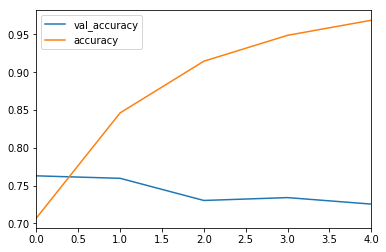

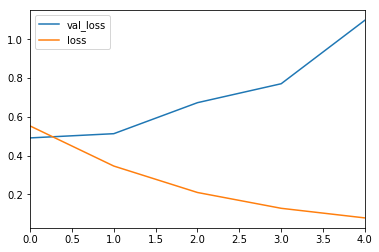

In [307]:
df = pd.DataFrame(history.history)
df[['val_accuracy', 'accuracy']].plot.line();
df[['val_loss', 'loss']].plot.line()

In [311]:
loss, accuracy = model_seq.evaluate(test_sentences, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

4336/4336 [==============================] - 1s 170us/step
Test loss: 1.1402626444492834
Test accuracy: 0.7271679043769836


## 3. Visualizations (3 pts)

Provide at least 3 visualizations of your work above. These can be in the respective sections. Use labels and legends. Be creative. Just please do not use word clouds...

In [1]:
# your code here